<a href="https://colab.research.google.com/github/rithvika7495/Dog-vs-Cat-Classification-using-Deep-Learning/blob/main/DogVSCatClassiferUsingDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Confguring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog Vs Cat Dataset From kaggle

In [5]:
#kaggle Api
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:10<00:00, 151MB/s]
100% 812M/812M [00:10<00:00, 84.5MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [9]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os 
# Counting the number of files in train folder 
path, dir, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of Images:', file_count)

Number of Images: 25000


Printing the name of the Images

In [12]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.5655.jpg', 'dog.4250.jpg', 'dog.11493.jpg', 'cat.195.jpg', 'cat.7134.jpg', 'dog.8414.jpg', 'dog.12197.jpg', 'cat.3045.jpg', 'dog.11030.jpg', 'dog.1917.jpg', 'dog.4278.jpg', 'cat.2506.jpg', 'cat.11552.jpg', 'cat.5544.jpg', 'cat.12192.jpg', 'cat.5753.jpg', 'cat.4673.jpg', 'cat.7142.jpg', 'dog.8883.jpg', 'cat.10893.jpg', 'dog.9587.jpg', 'cat.5883.jpg', 'dog.9952.jpg', 'cat.12391.jpg', 'cat.1969.jpg', 'cat.495.jpg', 'dog.6349.jpg', 'cat.10417.jpg', 'cat.3145.jpg', 'cat.9259.jpg', 'cat.5945.jpg', 'cat.11268.jpg', 'cat.3179.jpg', 'dog.2639.jpg', 'dog.7145.jpg', 'dog.8054.jpg', 'cat.8445.jpg', 'dog.5988.jpg', 'cat.4831.jpg', 'cat.104.jpg', 'cat.334.jpg', 'cat.1876.jpg', 'dog.4029.jpg', 'dog.8832.jpg', 'cat.8314.jpg', 'cat.5241.jpg', 'cat.2274.jpg', 'cat.2893.jpg', 'cat.3587.jpg', 'cat.2545.jpg', 'dog.2483.jpg', 'dog.4434.jpg', 'cat.4084.jpg', 'dog.11619.jpg', 'dog.9937.jpg', 'dog.4327.jpg', 'dog.566.jpg', 'dog.2987.jpg', 'dog.11041.jpg', 'cat.11715.jpg', 'cat.9487.jpg', 'dog.1684.jpg', 

Importing Dependencies

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

Displaying the Images of dogs and cats

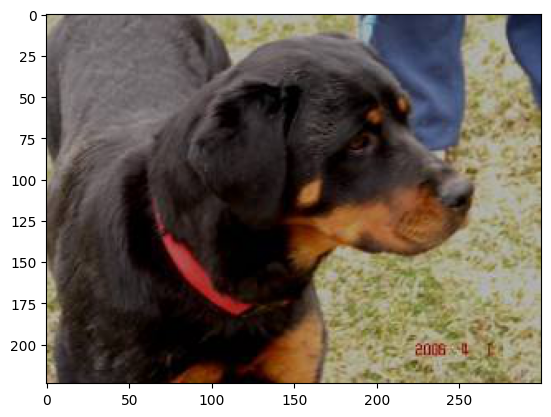

In [18]:
#displaying dog image
img = mpimg.imread('/content/train/dog.11030.jpg')
imgplt = plt.imshow(img)
plt.show()

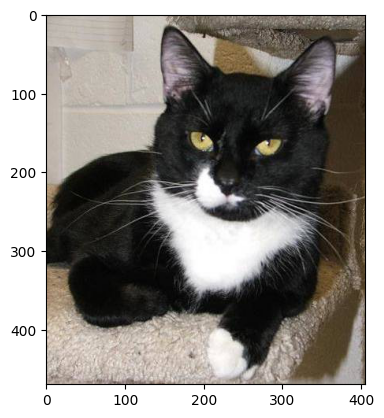

In [19]:
#displaying cat image
img = mpimg.imread('/content/train/cat.3045.jpg')
imgplt = plt.imshow(img)
plt.show()

Resizing all the images

In [20]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
dog
dog
cat
cat


In [21]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [22]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [23]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')
  newImgPath = resized_folder+filename
  img.save(newImgPath)

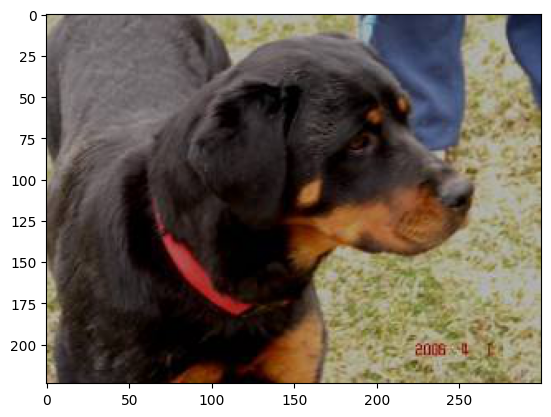

In [25]:
# display resized dog image
img = mpimg.imread('/content/train/dog.11030.jpg')
imgplt = plt.imshow(img)
plt.show()

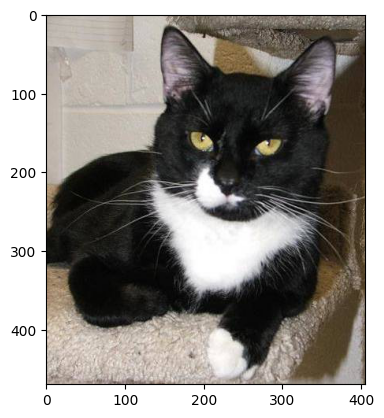

In [26]:
# display resized cat image
img = mpimg.imread('/content/train/cat.3045.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat -> 0
Dog -> 1

In [27]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [28]:
print(filenames[0:5])
print(len(filenames))

['cat.5655.jpg', 'dog.4250.jpg', 'dog.11493.jpg', 'cat.195.jpg', 'cat.7134.jpg']
2000


In [29]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 0]
2000


In [30]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 962 1038]


Converting all the resized images to numpy arrays

In [31]:
import cv2
import glob

In [32]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [33]:
print(dog_cat_images)

[[[[ 26  27  31]
   [ 27  28  32]
   [ 27  28  32]
   ...
   [ 44  43  53]
   [ 44  42  54]
   [ 44  42  54]]

  [[ 27  28  32]
   [ 28  29  33]
   [ 28  29  33]
   ...
   [ 46  45  55]
   [ 46  44  56]
   [ 46  44  56]]

  [[ 29  30  34]
   [ 29  30  34]
   [ 29  30  34]
   ...
   [ 45  45  57]
   [ 45  45  57]
   [ 45  45  57]]

  ...

  [[ 67  81  93]
   [ 67  81  93]
   [ 69  81  93]
   ...
   [ 92 102 112]
   [ 93 103 113]
   [ 93 103 113]]

  [[ 67  82  91]
   [ 67  82  91]
   [ 70  82  92]
   ...
   [ 93 103 113]
   [ 93 103 113]
   [ 93 103 113]]

  [[ 66  81  90]
   [ 66  81  90]
   [ 69  81  91]
   ...
   [ 92 102 112]
   [ 92 102 112]
   [ 91 101 111]]]


 [[[ 19  27  44]
   [ 19  27  44]
   [ 19  27  44]
   ...
   [  6  18  42]
   [  6  18  42]
   [  6  18  42]]

  [[ 19  27  44]
   [ 19  27  44]
   [ 19  27  44]
   ...
   [  6  18  42]
   [  6  18  42]
   [  6  18  42]]

  [[ 19  27  44]
   [ 19  27  44]
   [ 19  27  44]
   ...
   [  6  18  42]
   [  6  18  42]
   [  6  18

In [34]:
type(dog_cat_images)

numpy.ndarray

In [35]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [36]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split 

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> Training images

400 -> test images

In [39]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [40]:
print(X_train_scaled)

[[[[0.11372549 0.15686275 0.18823529]
   [0.15686275 0.2        0.23137255]
   [0.11764706 0.16078431 0.19215686]
   ...
   [0.44313725 0.52941176 0.54901961]
   [0.44705882 0.53333333 0.55294118]
   [0.44705882 0.53333333 0.55294118]]

  [[0.09019608 0.13333333 0.16470588]
   [0.13333333 0.17647059 0.20784314]
   [0.10588235 0.14901961 0.18039216]
   ...
   [0.45098039 0.5372549  0.55686275]
   [0.44313725 0.52941176 0.54901961]
   [0.43921569 0.5254902  0.54509804]]

  [[0.09411765 0.14901961 0.17254902]
   [0.19607843 0.25098039 0.2745098 ]
   [0.27843137 0.33333333 0.35686275]
   ...
   [0.45490196 0.54117647 0.56078431]
   [0.44313725 0.52941176 0.54901961]
   [0.43529412 0.52156863 0.54117647]]

  ...

  [[0.03921569 0.04313725 0.02745098]
   [0.01176471 0.02745098 0.00784314]
   [0.01568627 0.02745098 0.01960784]
   ...
   [0.08235294 0.14509804 0.19215686]
   [0.20392157 0.27058824 0.32156863]
   [0.32156863 0.38823529 0.43921569]]

  [[0.05098039 0.05098039 0.02745098]
   [0.0

Building a Neural Network

In [41]:
import tensorflow as tf
import tensorflow_hub as hub

In [42]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [44]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [46]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 74s 1s/step - loss: 0.2208 - acc: 0.9019
Epoch 2/5
50/50 [==============================] - 63s 1s/step - loss: 0.0754 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0597 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 63s 1s/step - loss: 0.0477 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 63s 1s/step - loss: 0.0368 - acc: 0.9900


In [47]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0544 - acc: 0.9775
Test Loss = 0.0544133298099041
Test Accuracy = 0.9775000214576721


Path of the image to be predicted: /content/cat.jpg


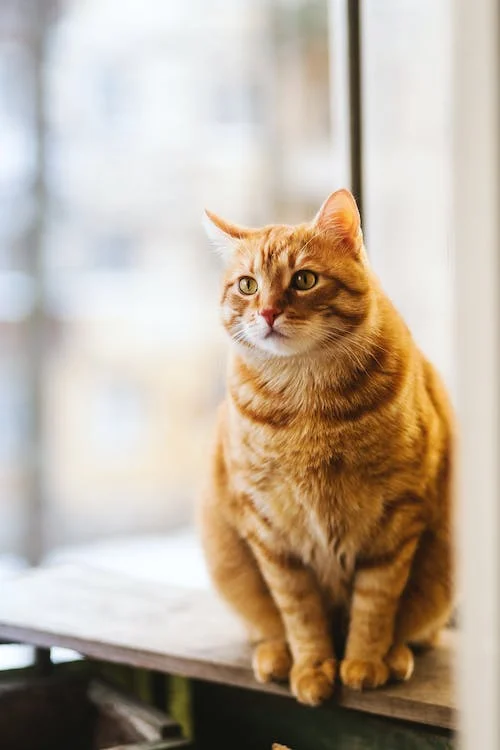

1/1 [==============================] - 0s 79ms/step
[[ 2.9042718 -4.1844144]]
0
The image represents a Cat


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


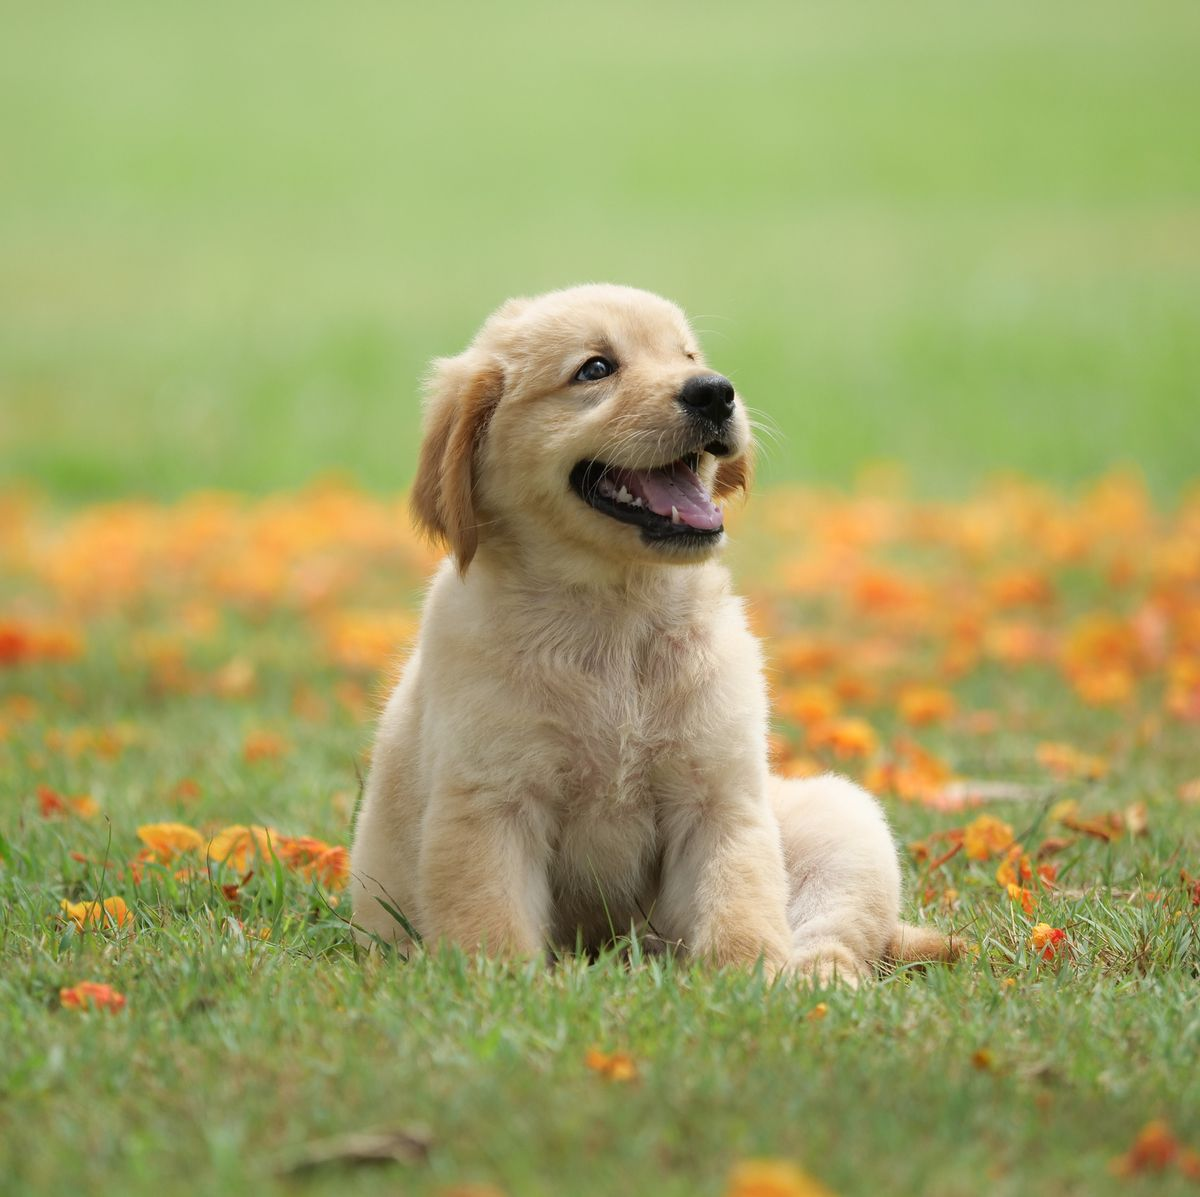

1/1 [==============================] - 1s 1s/step
[[-3.769554  2.90035 ]]
1
The image represents a Dog


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')